In [1]:
import ROOT
import numpy as np
import pandas as pd
import awkward as ak
import uproot
import os

#my custom python modules
from process_ntuples import process_ntuple, show
from plotting import *

import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/00


This part of the code is for processing ntuples into pandas data frames with a list of branches and batch size, specifically below is the Monte Carlo simulation for $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\Lambda_c^{+}\rightarrow p k^{-} \pi^{+}$

In [2]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
files

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root',
 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']

-------------------------------------------------------------------------------- $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ Analysis Starts here --------------------------------------------------------------------------------

In [3]:
TTree = process_ntuple(dir_path, files[0])
TTree.name

'CharmAnalysis'

In [4]:
#drop empty rows of data frame
def remove_empty(df):
    empty_indices = [i for i, x in enumerate(df[df.columns[0]]) if len(x) == 0]
    df = df.drop(empty_indices)
    df = df.reset_index(drop=True)
    return df

In [5]:
# hist = create_histogram(df["DMesons_pt"])
# c = ROOT.TCanvas("c", "c", 600, 500)
# hist.Draw()
# c.Draw()

In [6]:
DMesons_Truthdf = show(0, TTree, ['TruthParticles_Selected_daughterInfoT__pt', 'TruthParticles_Selected_daughterInfoT__phi','TruthParticles_Selected_daughterInfoT__eta', 'TruthParticles_Selected_daughterInfoT__pdgId'], 10000)
DMesons_Truthdf = remove_empty(DMesons_Truthdf)
DMesons_Truthdf

,TruthParticles_Selected_daughterInfoT__pt,TruthParticles_Selected_daughterInfoT__phi,TruthParticles_Selected_daughterInfoT__eta,TruthParticles_Selected_daughterInfoT__pdgId
0,"((1123.1682, 3878.585, 958.6866))","((1.2170534, 1.3581188, 0.70865583))","((1.0610737, 0.8769237, 1.0839401))","((-321, 211, 211))"
1,"((6099.8413, 1293.4324, 2749.1514))","((2.6134217, 2.7200499, 2.921711))","((0.16281185, 0.01096963, -0.0618442))","((-321, 211, 211))"
2,"((6289.112, 6667.3516, 6242.084, 28.585157))","((-0.37195462, -0.4972521, -0.5173161, -0.4602...","((-1.6081908, -1.7318903, -1.6300088, -1.675798))","((-321, 211, 211, 22))"
3,"((9216.71, 35438.234, 17588.225))","((1.943759, 1.9455862, 1.9117515))","((1.9568142, 1.9821448, 1.9503908))","((-321, 211, 211))"
4,"((2002.057, 217.7519, 3713.5286))","((-2.5672243, -2.1763499, -2.424952))","((-1.141573, -2.3164506, -1.0353537))","((-321, 211, 211))"
...,...,...,...,...
9995,"((2151.0593, 1245.3898, 2046.0638))","((-2.5996447, -2.952008, -2.2018938))","((0.20800702, 0.43235645, 0.42277658))","((-321, 211, 211))"
9996,"((2736.7104, 1384.2468, 1293.7802))","((3.1202385, 2.5702753, -3.0097811))","((0.06700771, 0.12232215, -0.2964751))","((-321, 211, 211))"
9997,"((2112.475, 251.03328, 5257.3037))","((0.42087388, 0.8593871, 0.20681547))","((1.6961367, 1.1129706, 1.5997151))","((-321, 211, 211))"
9998,"((821.93463, 4196.02, 163.92838))","((-0.80155736, -0.6736053, -1.2575617))","((1.2259598, 1.0538431, 0.102970615))","((-321, 211, 211))"


In [7]:
def divide_by_1000(x):
    x_arr = np.array(x)
    x_arr /= 1000
    return uproot.STLVector(x_arr.tolist())

DMesons_Truthdf["TruthParticles_Selected_daughterInfoT__pt"] = DMesons_Truthdf["TruthParticles_Selected_daughterInfoT__pt"].apply(divide_by_1000)

Creating Dalitz plot for Monte Carlo $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\Lambda_c^{+}\rightarrow p k^{-} \pi^{+}$, Using TLorentzVectors does it agree with CLEO (https://arxiv.org/pdf/0707.3060.pdf)>

In [8]:
k_mass = 0.493677 #Gev/c^2
pi_mass = 0.13957 #Gev/c^2
p_mass = 0.938 #Gev/c^2

def createTLorentzVectors(df):
    TLorentzVectorList = []
    for index, row in df.iterrows():
        pts = row['TruthParticles_Selected_daughterInfoT__pt'][0]
        etas = row['TruthParticles_Selected_daughterInfoT__eta'][0]
        phis = row['TruthParticles_Selected_daughterInfoT__phi'][0]
        pdgids = row['TruthParticles_Selected_daughterInfoT__pdgId'][0]

        for pt, eta, phi, pdgid in zip(pts, etas, phis, pdgids):
            if pdgid == 211:
                m = pi_mass
            elif pdgid == -321:
                m = k_mass
            elif pdgid == 2212:
                m = p_mass
            else:
                continue

            p = ROOT.TLorentzVector()
            p.SetPtEtaPhiM(pt, eta, phi, m)
            TLorentzVectorList.append(p)
            
    return TLorentzVectorList

inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

In [9]:
Dplus_TLorentzVectorList = createTLorentzVectors(DMesons_Truthdf)
reshaped_list = [Dplus_TLorentzVectorList[i:i+3] for i in range(0, len(Dplus_TLorentzVectorList), 3)]
np.shape(reshaped_list)

(10000, 3)

In [10]:
kpi_low = []
kpi_high = []

for sublist in reshaped_list:
    kpi_one = inv_mass_squared(sublist[0], sublist[1])
    kpi_two = inv_mass_squared(sublist[0], sublist[2])
    if kpi_one > kpi_two:
        kpi_high.append(kpi_one)
        kpi_low.append(kpi_two)
    else:
        #kpi_one < kpi_kpi_two:
        kpi_high.append(kpi_two)
        kpi_low.append(kpi_one)

In [11]:
# plot = scatter_plot(kpi_low, kpi_high, s = 0.5)
# plt.xlabel(r'$m^2(K^+\pi^-)$ low')
# plt.ylabel(r'$m^2(K^+\pi^-)$ high')
# plt.title("D+ Dalitz Plot")
# plt.show()

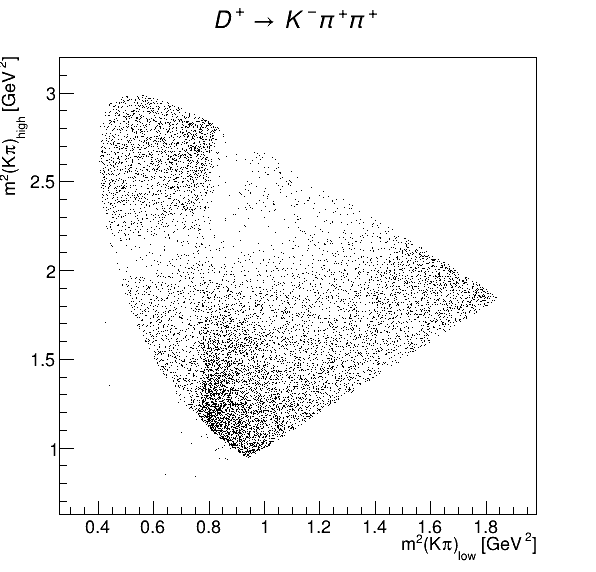

In [12]:
# Create a TGraph from the x and y arrays
graph = createTGraph(np.array(kpi_low), np.array(kpi_high), title=r"$D^{+} \rightarrow K^{-}\pi^{+}\pi^{+}$", xtitle="m^{2}(K#pi)_{low} [GeV^{2}]", ytitle="m^{2}(K#pi)_{high} [GeV^{2}]")

# Draw the TGraph
c = ROOT.TCanvas("c", "c", 600, 600)
graph.SetMarkerColor(1) # Black
graph.SetMarkerStyle(1)
graph.Draw("AP")
c.Draw()

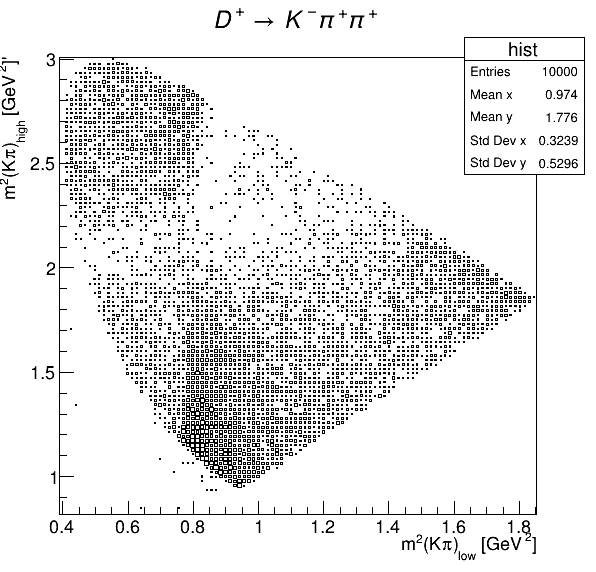

In [13]:
# canvas = TCanvas("canvas", "Canvas Title", 800, 600)

nbinsx = 100
xmin = np.min(kpi_low)
xmax = np.max(kpi_low)

nbinsy = 100
ymin = np.min(kpi_high)
ymax = np.max(kpi_high)

hist = create_2dhistogram(kpi_low, kpi_high, r"$D^{+} \rightarrow K^{-}\pi^{+}\pi^{+}$", "m^{2}(K#pi)_{low} [GeV^{2}]", "m^{2}(K#pi)_{high} [GeV^{2}]'", 100, np.min(kpi_low), np.max(kpi_low), 100, np.min(kpi_high), np.max(kpi_high))
canvas = ROOT.TCanvas("canvas", "Canvas Title", 600, 600)

hist.SetOption("BOX")
hist.SetLineColor(ROOT.kBlack)
hist.GetYaxis().SetRangeUser(0, 3)
hist.GetXaxis().SetRangeUser(0, 3)
hist.Draw()
canvas.Draw()

Text(0, 0.5, 'Counts')

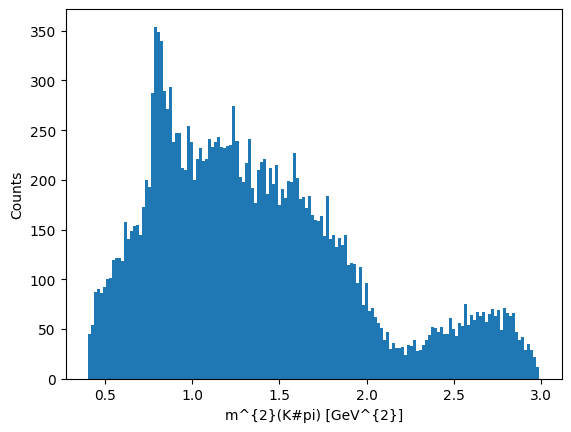

In [14]:
k_pis = kpi_low

for i in kpi_high:
    k_pis.append(i)

plt.hist(k_pis, bins = 150);
plt.xlabel("m^{2}(K#pi) [GeV^{2}]")
plt.ylabel("Counts")

Non Truth Level $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ Analysis 

First step is to keep dtype 11 ($\lambda) particles and remove dtype 4 (D^+)

In [15]:
DMesons_df2 = show(0, TTree, ["DMesons_daughterInfo__pt", "DMesons_daughterInfo__eta", "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId"], 1000)
DMesons_df2 = remove_empty(DMesons_df2)
DMesons_df2

,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId
0,"((1118.3367, 3805.8997, 971.6052), (3805.8997,...","((1.0579262, 0.8759657, 1.0816675), (0.8759657...","((1.2175969, 1.3583351, 0.71336174), (1.358335...","((-321, 211, 211), (2212, -321, 211))"
1,"((6094.893, 1307.462, 2733.4648))","((0.15998553, 0.011107716, -0.0614343))","((2.6128821, 2.7195172, 2.9228168))","((-321, 211, 211))"
2,"((6457.058, 5970.0933, 6637.575), (6605.627, 6...","((-1.608788, -1.6307458, -1.7315177), (-1.7326...","((-0.371787, -0.5164238, -0.4971406), (-0.4966...","((-321, 211, 211), (2212, -321, 211))"
3,"((3794.4978, 3308.3105, 3065.4814), (3308.3105...","((-0.073717244, 0.22605924, -0.017923404), (0....","((0.753864, 0.6827104, 0.920779), (0.6827104, ...","((-321, 211, 211), (2212, -321, 211))"
4,"((3781.5564, 7396.4673, 1412.3259), (7396.4673...","((-0.9284433, -1.182188, -1.1012387), (-1.1821...","((0.8518817, 0.7419038, 0.77916163), (0.741903...","((-321, 211, 211), (2212, -321, 211))"
...,...,...,...,...
556,"((2248.0342, 1560.9309, 1777.5198), (1776.7628...","((-0.27776414, -0.030297821, 0.18143338), (0.1...","((2.6425247, 2.1114702, 2.3337889), (2.3332653...","((-321, 211, 211), (2212, -321, 211))"
557,"((2843.811, 12120.83, 15722.865), (12120.83, 2...","((1.6837795, 1.7058395, 1.7437785), (1.7058395...","((-0.5526616, -0.51433957, -0.4968482), (-0.51...","((-321, 211, 211), (2212, -321, 211), (2212, -..."
558,"((5232.3657, 5543.935, 850.05676), (5543.935, ...","((-0.24407308, -0.15124202, -0.6015392), (-0.1...","((0.29564288, 0.23316427, -0.011730594), (0.23...","((-321, 211, 211), (2212, -321, 211))"
559,"((5233.4795, 1644.8683, 2888.8506))","((-0.20566566, 0.1395557, -0.22413868))","((-1.8748832, -1.9805108, -1.8100455))","((2212, -321, 211))"


In [16]:
for i in DMesons_df2["DMesons_daughterInfo__pdgId"][0]:
    print(list(i))

[-321, 211, 211]
[2212, -321, 211]


-------------------------------------------------------------------------------- $\lambda_C^+$ Analysis Starts here --------------------------------------------------------------------------------

In [17]:
TTree3 = process_ntuple(dir_path, files[1])

lambda_tdf = show(0, TTree3, ['TruthParticles_Selected_daughterInfoT__pt', 'TruthParticles_Selected_daughterInfoT__phi','TruthParticles_Selected_daughterInfoT__eta', 'TruthParticles_Selected_daughterInfoT__pdgId'], 10000)
lambda_tdf = remove_empty(lambda_tdf)

lambda_tdf["TruthParticles_Selected_daughterInfoT__pt"] = lambda_tdf["TruthParticles_Selected_daughterInfoT__pt"].apply(divide_by_1000)

lambda_tdf

,TruthParticles_Selected_daughterInfoT__pt,TruthParticles_Selected_daughterInfoT__phi,TruthParticles_Selected_daughterInfoT__eta,TruthParticles_Selected_daughterInfoT__pdgId
0,"([6.130839824676514, 3.433704376220703, 6.1246...","((-2.106452, -2.2067764, -2.202212))","((-2.0240848, -2.0725062, -1.8902587))","((2212, -321, 211))"
1,"([3.8561272621154785, 0.2663457691669464, 3.64...","((2.2966359, 2.0602465, 1.9333525))","((-0.3594819, 0.124157935, -0.2871962))","((2212, 211, -321))"
2,"([2.729074001312256, 4.162532806396484, 0.5299...","((2.7226782, 2.510235, 2.51115))","((-0.1434682, 0.19480081, 0.26785102))","((2212, -321, 211))"
3,"([61.98374938964844, 28.00506591796875, 10.250...","((-2.6987386, -2.6988401, -2.6461754))","((-0.29596475, -0.28630117, -0.28976095))","((2212, -321, 211))"
4,"([7.744321346282959, 2.3987538814544678, 0.841...","((0.18166617, 0.054863453, 0.004921999))","((-0.20847009, -0.22605774, -0.47194183))","((2212, 211, -321))"
...,...,...,...,...
9995,"([2.5323121547698975, 0.9172168374061584, 2.03...","((-2.5774815, -2.6905293, -2.4432852))","((1.0106094, 0.86975276, 0.4058634))","((2212, 211, -321))"
9996,"([5.4393815994262695, 2.846998691558838, 3.596...","((1.097283, 1.2157772, 1.3903624))","((-2.1886082, -2.152903, -2.1724207))","((2212, -321, 211))"
9997,"([5.440489768981934, 1.408139944076538, 1.0911...","((-1.9652525, -1.9222608, -2.3743248))","((-0.26092234, -0.25988173, -0.64190143))","((2212, -321, 211))"
9998,"([7.5288848876953125, 3.180478572845459, 4.519...","((2.6085212, 2.565044, 2.5214121))","((-1.751375, -1.6975358, -1.9437438))","((2212, 211, -321))"


In [18]:
lambda_TLorentzVectors = createTLorentzVectors(lambda_tdf)

reshaped_list2 = [lambda_TLorentzVectors[i:i+3] for i in range(0, len(lambda_TLorentzVectors), 3)]
np.shape(lambda_TLorentzVectors)

(30000,)

In [19]:
pk_list = []
kpi_list = []

#find the ordering of the Loretnz Vectors

p_LorentzVectors = []
k_LorentzVectors = []
pi_LorentzVectors = []
for i in lambda_TLorentzVectors:
    if round(i.M(), 3) == p_mass:
        p_LorentzVectors.append(i)
    elif round(i.M(), 6) == k_mass:
        k_LorentzVectors.append(i)
    elif round(i.M(), 4) == 0.1396:
        pi_LorentzVectors.append(i)
        
for i in range(len(p_LorentzVectors)):
    pk = inv_mass_squared(p_LorentzVectors[i], k_LorentzVectors[i])
    kpi = inv_mass_squared(k_LorentzVectors[i], pi_LorentzVectors[i])
    pk_list.append(pk)
    kpi_list.append(kpi)

In [20]:
#scatter_plot(kpi_list, pk_list, "$\Lambda_C^+$ Dalitz Plot", r'$m^2(K^+\pi^-)$ low', r'$m^2(pK^-)$ high', .3)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


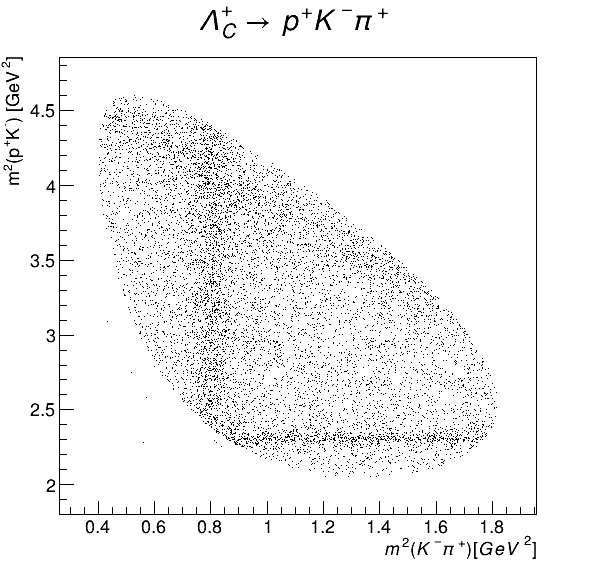

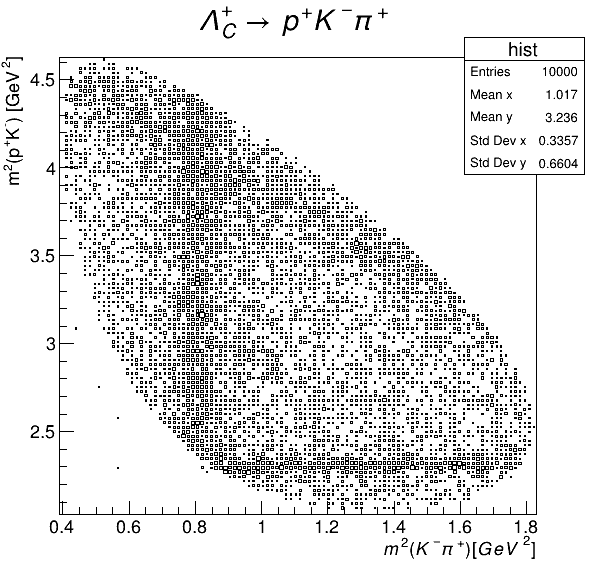

In [22]:
graph = createTGraph(np.array(kpi_list), np.array(pk_list), title=r"$\Lambda_C^{+} \rightarrow p^{+}K^{-}\pi^{+}$", xtitle="m^{2}(K^{-}\pi^{+}) [GeV^{2}]", ytitle="m^{2}(p^{+}K^{-}) [GeV^{2}]")

# Draw the TGraph
c = ROOT.TCanvas("c", "c", 600, 600)
graph.SetMarkerColor(1) # Black
graph.SetMarkerStyle(1)
graph.Draw("AP")
c.Draw()

hist = create_2dhistogram(kpi_list, pk_list, r"$\Lambda_C^{+} \rightarrow p^{+}K^{-}\pi^{+}$", "m^{2}(K^{-}\pi^{+}) [GeV^{2}]", "m^{2}(p^{+}K^{-}) [GeV^{2}]", 100, np.min(kpi_list), np.max(kpi_list), 100, np.min(pk_list), np.max(pk_list))
canvas = ROOT.TCanvas("canvas", "Canvas Title", 600, 600)

hist.SetOption("BOX")
hist.SetLineColor(ROOT.kBlack)
hist.GetYaxis().SetRangeUser(0, 10)
hist.GetXaxis().SetRangeUser(0, 10)
hist.Draw()
canvas.Draw()